Importando as bibliotecas necessárias

In [2]:
#Para manipular e plotagens
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Para modelagem
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

#Para ver as features mais importantes
import shap

Baixando as bases

In [5]:
url_cadastral = 'https://raw.githubusercontent.com/R1chardJr/Case_Ciencia_de_Dados/refs/heads/main/base_cadastral.csv'
url_info = 'https://raw.githubusercontent.com/R1chardJr/Case_Ciencia_de_Dados/refs/heads/main/base_info.csv'
url_pagamentos_desenvolvimento = 'https://raw.githubusercontent.com/R1chardJr/Case_Ciencia_de_Dados/refs/heads/main/base_pagamentos_desenvolvimento.csv'
url_pagamentos_teste = 'https://raw.githubusercontent.com/R1chardJr/Case_Ciencia_de_Dados/refs/heads/main/base_pagamentos_teste.csv'

try:
    base_cadastral = pd.read_csv(url_cadastral,sep = ';')
    base_info = pd.read_csv(url_info,sep = ';')
    base_pagamentos_desenvolvimento = pd.read_csv(url_pagamentos_desenvolvimento,sep = ';')
    base_pagamentos_teste = pd.read_csv(url_pagamentos_teste,sep = ';')
    print("Arquivos carregados com sucesso!")
except Exception as e:
    print(f"Ocorreu um erro: {e}")

Arquivos carregados com sucesso!


Agora vamos analisar os dados que temos. De maneira geral, iremos usar alguns comandos para todas as bases a fim de entendê-las melhor. São eles: `.head()`(para termos uma noção de como é a base), `.shape`(para sabermos o tamanho da base), `.info()`(para ver os tipos de dados e o número de não nulos) e `.isnull().sum()`(para ver a quantidade de valores nulos em cada coluna).

Além disso, para variáveis categóricas a função `.value_counts()`(para ver a quantidade de aparições de cada categoria) e para variáveis numéricas `.describe()`(para saber a média,valor mínimo,máximo, etc)





# Análise Base cadastral

In [6]:
base_cadastral.head()

,ID_CLIENTE,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG
0,1661240395903230676,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65
1,8274986328479596038,2017-01-25,31,NaN,Comércio,YAHOO,MEDIO,77
2,345447888460137901,2000-08-15,75,NaN,Serviços,HOTMAIL,PEQUENO,48
3,1003144834589372198,2017-08-06,49,NaN,Serviços,OUTLOOK,PEQUENO,89
4,324916756972236008,2011-02-14,88,NaN,Serviços,GMAIL,GRANDE,62


In [4]:
base_cadastral.shape

(1315, 8)

In [5]:
base_cadastral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_CLIENTE           1315 non-null   int64 
 1   DATA_CADASTRO        1315 non-null   object
 2   DDD                  1078 non-null   object
 3   FLAG_PF              66 non-null     object
 4   SEGMENTO_INDUSTRIAL  1232 non-null   object
 5   DOMINIO_EMAIL        1285 non-null   object
 6   PORTE                1274 non-null   object
 7   CEP_2_DIG            1315 non-null   object
dtypes: int64(1), object(7)
memory usage: 82.3+ KB


In [6]:
print(base_cadastral['DDD'].unique())

['99' '31' '75' '49' '88' '18' '67' '21' '11' '44' nan '19' '14' '16' '85'
 '41' '51' '12' '62' '43' '91' '42' '61' '33' '48' '71' '65' '38' '24'
 '(3' '47' '28' '(2' '81' '35' '13' '86' '94' '45' '17' '55' '64' '69'
 '32' '(6' '27' '66' '63' '46' '(1' '54' '77' '34' '74' '37' '53' '56'
 '95' '22' '73' '(9' '(4' '52' '87' '98' '(8' '92' '82' '79' '93' '83'
 '00' '(5' '15' '02' '84' '(0' '04' '07' '(7']


In [7]:
print(base_cadastral['CEP_2_DIG'].unique())

['65' '77' '48' '89' '62' '19' '38' '26' '55' '87' '37' '22' '13' '18'
 '21' '98' '14' '60' '82' '92' '79' '12' '27' '76' '67' '72' '68' '11'
 '84' '70' '83' '88' '75' '36' '45' '44' '16' '42' '78' '31' '41' '35'
 '51' '30' '86' '25' '29' '17' '23' '20' '93' '64' '95' '85' '15' '99'
 '80' '24' '61' '90' '50' '96' '97' '57' '46' '47' '32' '54' '91' '56'
 '28' '71' '33' '94' '58' '34' '59' '69' '74' '40' '49' '43' '66' '39'
 '73' '81' '53' '52' '63' 'na']


In [8]:
base_cadastral.isnull().sum()

ID_CLIENTE                0
DATA_CADASTRO             0
DDD                     237
FLAG_PF                1249
SEGMENTO_INDUSTRIAL      83
DOMINIO_EMAIL            30
PORTE                    41
CEP_2_DIG                 0
dtype: int64

In [9]:
#Porcentagem de valores nulos
print(f"Porcentagem de valores nulos em DDD:{base_cadastral['DDD'].isnull().sum() / len(base_cadastral) * 100:.2f}%")
print(f"Porcentagem de valores nulos em SEGMENTO_INDUSTRIAL:{base_cadastral['SEGMENTO_INDUSTRIAL'].isnull().sum() / len(base_cadastral) * 100:.2f}%")
print(f"Porcentagem de valores nulos em DOMINIO_EMAIL:{base_cadastral['DOMINIO_EMAIL'].isnull().sum() / len(base_cadastral) * 100:.2f}%")
print(f"Porcentagem de valores nulos em PORTE:{base_cadastral['PORTE'].isnull().sum() / len(base_cadastral) * 100:.2f}%")

Porcentagem de valores nulos em DDD:18.02%
Porcentagem de valores nulos em SEGMENTO_INDUSTRIAL:6.31%
Porcentagem de valores nulos em DOMINIO_EMAIL:2.28%
Porcentagem de valores nulos em PORTE:3.12%


In [10]:
base_cadastral['SEGMENTO_INDUSTRIAL'].value_counts()

SEGMENTO_INDUSTRIAL
Serviços     503
Comércio     431
Indústria    298
Name: count, dtype: int64

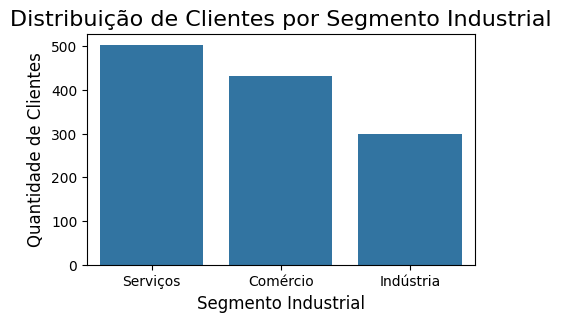

In [11]:
plt.figure(figsize=(5, 3))

sns.countplot(data=base_cadastral, x='SEGMENTO_INDUSTRIAL', order = base_cadastral['SEGMENTO_INDUSTRIAL'].value_counts().index)

plt.title('Distribuição de Clientes por Segmento Industrial', fontsize=16)
plt.xlabel('Segmento Industrial', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)

plt.show()

In [12]:
base_cadastral['PORTE'].value_counts()

PORTE
MEDIO      522
GRANDE     480
PEQUENO    272
Name: count, dtype: int64

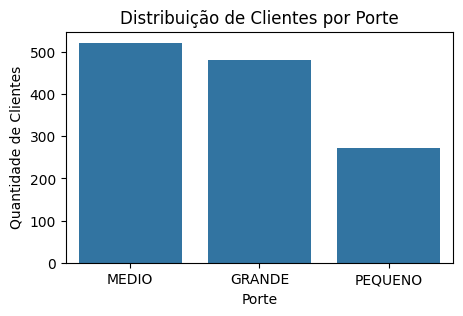

In [13]:
plt.figure(figsize=(5, 3))

sns.countplot(data=base_cadastral, x='PORTE', order = base_cadastral['PORTE'].value_counts().index)

plt.title('Distribuição de Clientes por Porte')
plt.xlabel('Porte')
plt.ylabel('Quantidade de Clientes')

plt.show()

In [14]:
base_cadastral['DOMINIO_EMAIL'].value_counts()

DOMINIO_EMAIL
YAHOO      392
GMAIL      390
HOTMAIL    323
AOL         74
OUTLOOK     72
BOL         34
Name: count, dtype: int64

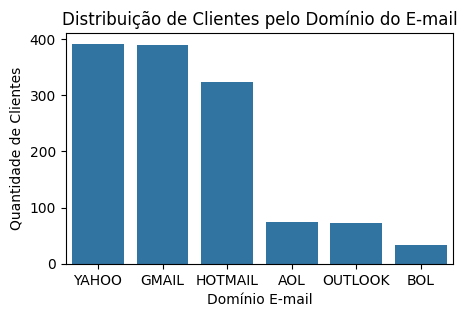

In [15]:
plt.figure(figsize=(5, 3))

sns.countplot(data=base_cadastral, x='DOMINIO_EMAIL', order = base_cadastral['DOMINIO_EMAIL'].value_counts().index)

plt.title('Distribuição de Clientes pelo Domínio do E-mail')
plt.xlabel('Domínio E-mail')
plt.ylabel('Quantidade de Clientes')

plt.show()

Para analisar a distribuição das variáveis categóricas, foram gerados gráficos de barras. Essa abordagem visual facilita a identificação de categorias dominantes e desbalanceamentos nos dados, que podem impactar a modelagem.

Fazendo um resumo da base_cadastral. O primeiro ponto é tratar a coluna 'FLAG_PF' que conta com maior parte de valores nulos, contudo já sabemos que esse valor nulo na verdade representa que não se trata de um cliente pessoa física, assim podemos dar o valor de 0 para eles e caso contrário 1. Além disso,tanto a coluna 'DDD' e 'CEP_2_DIG' tem no tipo object e ao analisar vemos algumas inconsistencias que será necessário tratar . Na distribuição das categorias 'SEGMENTO_INDUSTRIAL' e 'PORTE', em ambas há um desbalanceamento moderado, não há uma categoria extremamente dominante, mas as classes minoritárias (PEQUENO e Indústria) que têm uma representatividade menor que precisará ser observada. Fora isso, temos que tratar alguns valores nulos em algumas colunas e alterar as datas para o formato datetime para poder manipular futuramente.

# Análise Base info

In [7]:
base_info.head()

,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
0,1661240395903230676,2018-09,16913.0,NaN
1,8274986328479596038,2018-09,106430.0,141.0
2,345447888460137901,2018-09,707439.0,99.0
3,1003144834589372198,2018-09,239659.0,96.0
4,324916756972236008,2018-09,203123.0,103.0


In [17]:
base_info.shape

(24401, 4)

In [18]:
base_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24401 entries, 0 to 24400
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_CLIENTE          24401 non-null  int64  
 1   SAFRA_REF           24401 non-null  object 
 2   RENDA_MES_ANTERIOR  23684 non-null  float64
 3   NO_FUNCIONARIOS     23149 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 762.7+ KB


In [19]:
base_info.isnull().sum()

ID_CLIENTE               0
SAFRA_REF                0
RENDA_MES_ANTERIOR     717
NO_FUNCIONARIOS       1252
dtype: int64

In [20]:
print(f"Porcentagem de valores nulos em PORTE:{base_info['RENDA_MES_ANTERIOR'].isnull().sum() / len(base_info) * 100:.2f}%")
print(f"Porcentagem de valores nulos em NO_FUNCIONARIOS:{base_info['NO_FUNCIONARIOS'].isnull().sum() / len(base_info) * 100:.2f}%")

Porcentagem de valores nulos em PORTE:2.94%
Porcentagem de valores nulos em NO_FUNCIONARIOS:5.13%


In [21]:
base_info[['RENDA_MES_ANTERIOR','NO_FUNCIONARIOS']].describe()

,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
count,2.368400e+04,23149.000000
mean,2.887514e+05,117.799646
std,2.115948e+05,21.464574
min,1.050000e+02,0.000000
25%,1.338662e+05,106.000000
50%,2.409985e+05,118.000000
75%,3.925018e+05,131.000000
max,1.682759e+06,198.000000


Criando o histograma para analisar a distribuição de frequência dos dados e após isso o boxplot para ter um resumo estatístico rápido e identificar valores outliers

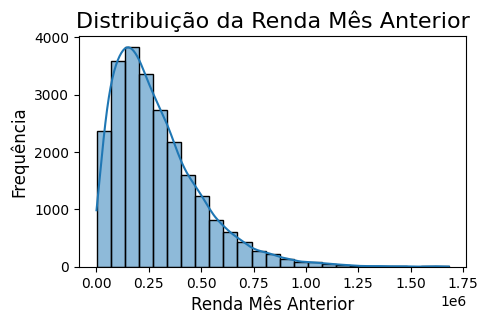

In [22]:
plt.figure(figsize=(5, 3))


sns.histplot(data=base_info, x='RENDA_MES_ANTERIOR', bins=25, kde=True)

plt.title('Distribuição da Renda Mês Anterior', fontsize=16)
plt.xlabel('Renda Mês Anterior', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

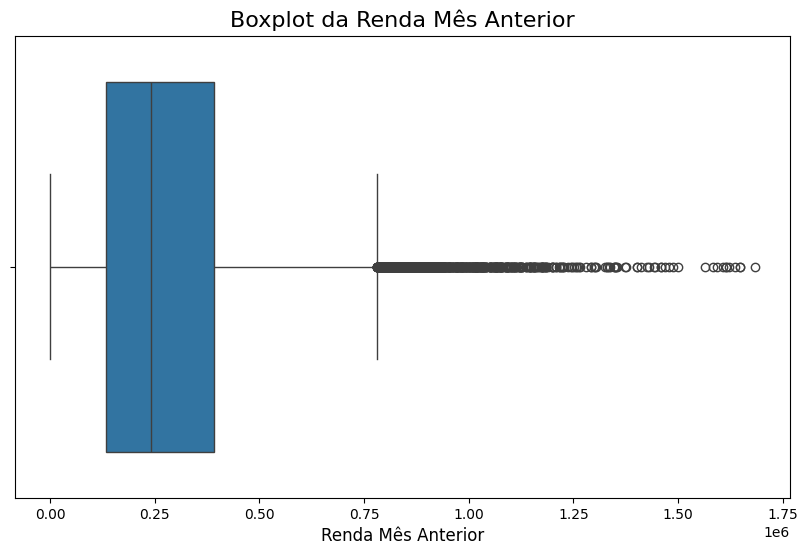

In [23]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=base_info, x='RENDA_MES_ANTERIOR')

plt.title('Boxplot da Renda Mês Anterior', fontsize=16)
plt.xlabel('Renda Mês Anterior', fontsize=12)
plt.show()

Hipótese:Clientes com 0 funcionários são clientes pessoa física

In [24]:
merged_base = pd.merge(base_info, base_cadastral, on='ID_CLIENTE', how='left')

clientes_0_funcionarios = merged_base[merged_base['NO_FUNCIONARIOS'] == 0]
clientes_0_funcionarios_pf = clientes_0_funcionarios[clientes_0_funcionarios['FLAG_PF'] == 'X']

clientes_0_funcionarios_pf[['ID_CLIENTE', 'FLAG_PF', 'NO_FUNCIONARIOS']].drop_duplicates()

print(f"\nTotal de clientes com 0 funcionários encontrados na base_info: {len(clientes_0_funcionarios['ID_CLIENTE'].unique())}")
print(f"Total de clientes com 0 funcionários que são Pessoa Física: {len(clientes_0_funcionarios_pf.drop_duplicates(subset=['ID_CLIENTE']))}")


Total de clientes com 0 funcionários encontrados na base_info: 66
Total de clientes com 0 funcionários que são Pessoa Física: 66


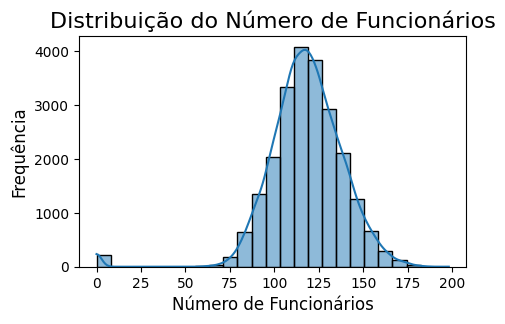

In [89]:
plt.figure(figsize=(5, 3))


sns.histplot(data=base_info, x='NO_FUNCIONARIOS', bins=25, kde=True)

plt.title('Distribuição do Número de Funcionários', fontsize=16)
plt.xlabel('Número de Funcionários', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

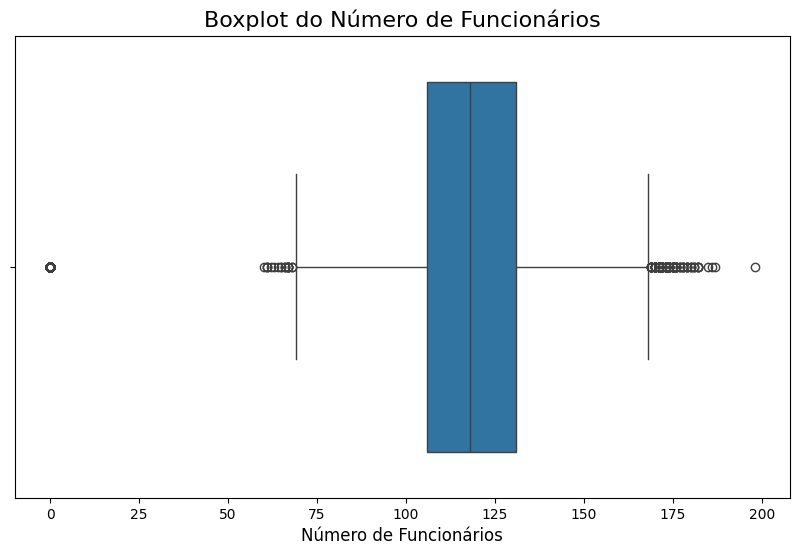

In [206]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=base_info, x='NO_FUNCIONARIOS')

plt.title('Boxplot do Número de Funcionários', fontsize=16)
plt.xlabel('Número de Funcionários', fontsize=12)
plt.show()

Analisando a base_info logo percebemos que teremos que lidar com alguns valores faltantes em 'RENDA_MES_ANTERIOR' e 'NO_FUNCIONARIOS'. Com relação a 'RENDA_MES_ANTERIOR' vemos no histograma(pela cauda longa) e no boxplot(pela quantidade de pontos a direita) que há muitos outliers nessa variável, para fazer com que esses dados não acabem destruindo o modelo será preciso aplicar uma transformação logarítmica nos dados. Por último, em 'NO_FUNCIONARIOS' temos uma distribuição quase que Normal e sem necessidade de transformação, no caso de haver 0 funcionários tive a hipótese de ser de clientes pessoa física e foi confirmado

# Análise Base pagamentos desenvolvimento

In [8]:
base_pagamentos_desenvolvimento.head()

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99


In [28]:
base_pagamentos_desenvolvimento.shape

(77414, 7)

In [29]:
base_pagamentos_desenvolvimento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77414 entries, 0 to 77413
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_CLIENTE              77414 non-null  int64  
 1   SAFRA_REF               77414 non-null  object 
 2   DATA_EMISSAO_DOCUMENTO  77414 non-null  object 
 3   DATA_PAGAMENTO          77414 non-null  object 
 4   DATA_VENCIMENTO         77414 non-null  object 
 5   VALOR_A_PAGAR           76244 non-null  float64
 6   TAXA                    77414 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 4.1+ MB


In [30]:
base_pagamentos_desenvolvimento.isnull().sum()

ID_CLIENTE                   0
SAFRA_REF                    0
DATA_EMISSAO_DOCUMENTO       0
DATA_PAGAMENTO               0
DATA_VENCIMENTO              0
VALOR_A_PAGAR             1170
TAXA                         0
dtype: int64

In [31]:
print(f"Porcentagem de valores nulos em VALOR_A_PAGAR:{base_pagamentos_desenvolvimento['VALOR_A_PAGAR'].isnull().sum() / len(base_pagamentos_desenvolvimento) * 100:.2f}")

Porcentagem de valores nulos em VALOR_A_PAGAR:1.51


In [32]:
base_pagamentos_desenvolvimento[['VALOR_A_PAGAR','TAXA']].describe()

,VALOR_A_PAGAR,TAXA
count,7.624400e+04,77414.000000
mean,4.659078e+04,6.789623
std,4.643393e+04,1.798225
min,1.000000e-01,4.990000
25%,1.876536e+04,5.990000
50%,3.475869e+04,5.990000
75%,6.093384e+04,6.990000
max,4.400000e+06,11.990000


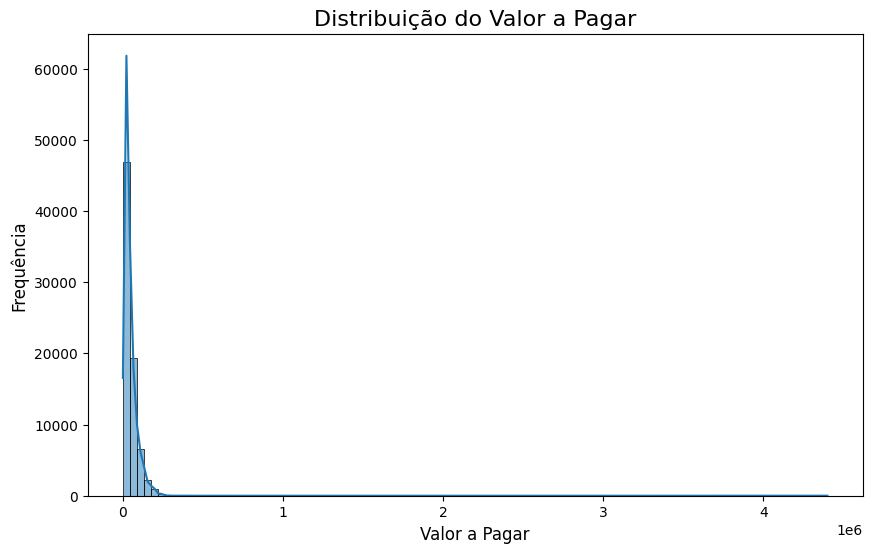

In [33]:
plt.figure(figsize=(10, 6))

sns.histplot(data=base_pagamentos_desenvolvimento, x='VALOR_A_PAGAR', bins=100, kde=True)

plt.title('Distribuição do Valor a Pagar', fontsize=16)
plt.xlabel('Valor a Pagar', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

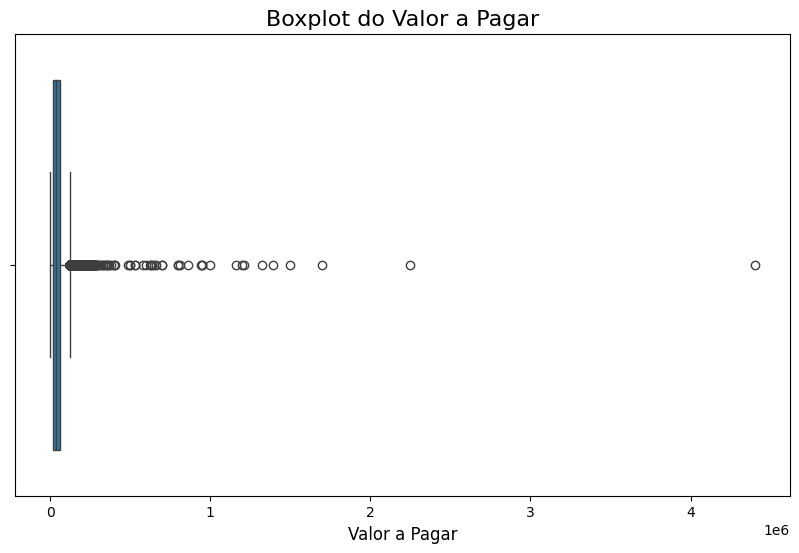

In [34]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=base_pagamentos_desenvolvimento, x='VALOR_A_PAGAR')

plt.title('Boxplot do Valor a Pagar', fontsize=16)
plt.xlabel('Valor a Pagar', fontsize=12)
plt.show()

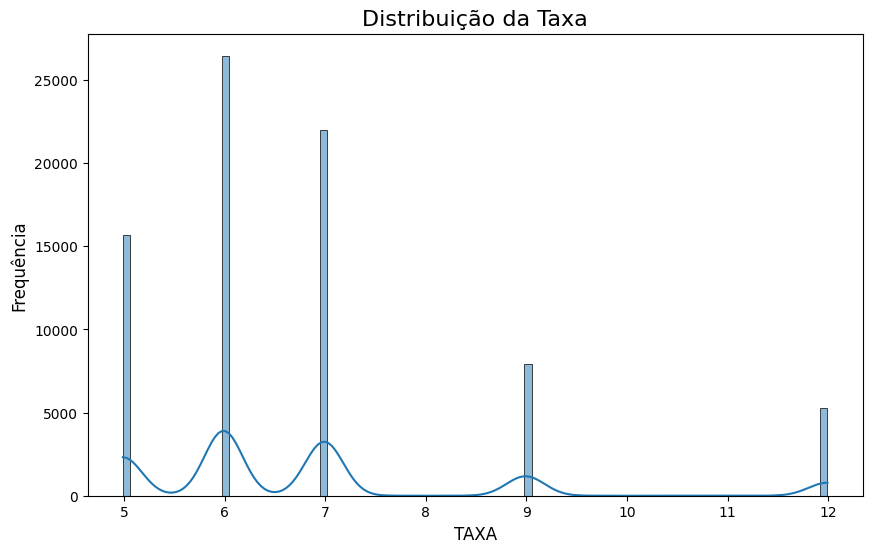

In [35]:
plt.figure(figsize=(10, 6))

sns.histplot(data=base_pagamentos_desenvolvimento, x='TAXA', bins=100, kde=True)

plt.title('Distribuição da Taxa', fontsize=16)
plt.xlabel('TAXA', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

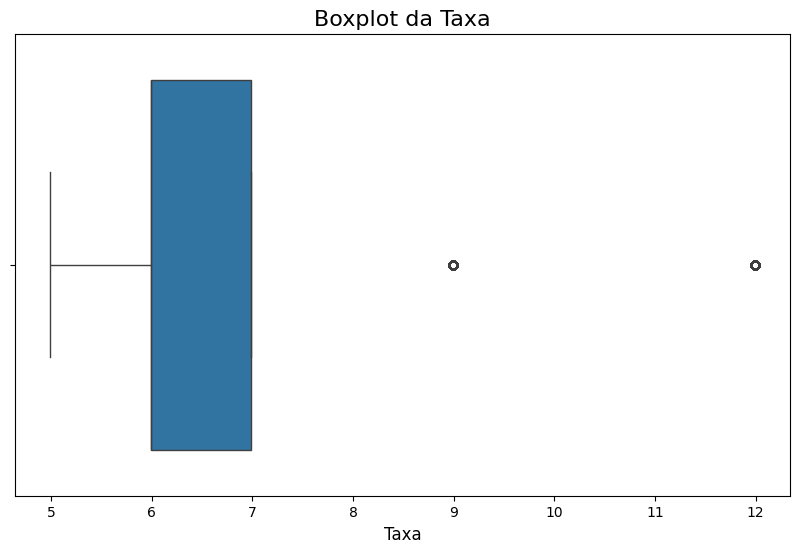

In [36]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=base_pagamentos_desenvolvimento, x='TAXA')

plt.title('Boxplot da Taxa', fontsize=16)
plt.xlabel('Taxa', fontsize=12)
plt.show()

Analisando a base_pagamentos_desenvolvimento vemos logo de cara que é necessária converter os tipos dos dados que se referem a datas para o formato datetime, para poder manipular e criar a variável target tambem, que será criada a partir das colunas 'DATA_PAGAMENTO' e 'DATA_VENCIMENTO'. A coluna 'VALOR_A_PAGAR'(que é a única com valores nulos nessa base e precisaremos tratar mais a frente) o histograma vemos que há a maioria das cobranças são de valores baixos, sendo isso confirmado pelo bloxpot também e além disso evidencia a existencia de outliers que serão um problema futuramente para o modelo(mas podemos resolver isso com uma transformação logarítmica). Já na coluna 'TAXA' no histograma temos uma distribuição multimodal, atuando como degraus(o que é positivo para modelos como random forest e XGBoost

# Análise Base pagamentos teste

In [9]:
base_pagamentos_teste.head()

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
0,5058298901476893676,2021-07,2021-07-14,2021-08-04,11204.75,4.99
1,274692171162531764,2021-07,2021-07-08,2021-08-23,60718.50,5.99
2,274692171162531764,2021-07,2021-07-11,2021-08-25,60718.50,5.99
3,274692171162531764,2021-07,2021-07-16,2021-08-30,62250.00,5.99
4,465309249432033993,2021-07,2021-07-05,2021-07-30,26593.95,6.99


In [38]:
base_pagamentos_teste.shape

(12275, 6)

In [39]:
base_pagamentos_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12275 entries, 0 to 12274
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_CLIENTE              12275 non-null  int64  
 1   SAFRA_REF               12275 non-null  object 
 2   DATA_EMISSAO_DOCUMENTO  12275 non-null  object 
 3   DATA_VENCIMENTO         12275 non-null  object 
 4   VALOR_A_PAGAR           12144 non-null  float64
 5   TAXA                    12275 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 575.5+ KB


In [40]:
base_pagamentos_teste.isnull().sum()

ID_CLIENTE                  0
SAFRA_REF                   0
DATA_EMISSAO_DOCUMENTO      0
DATA_VENCIMENTO             0
VALOR_A_PAGAR             131
TAXA                        0
dtype: int64

In [41]:
print(f"Porcentagem de valores nulos em VALOR_A_PAGAR:{base_pagamentos_teste['VALOR_A_PAGAR'].isnull().sum() / len(base_pagamentos_teste) * 100:.2f}")

Porcentagem de valores nulos em VALOR_A_PAGAR:1.07


In [42]:
base_pagamentos_teste[['VALOR_A_PAGAR','TAXA']].describe()

,VALOR_A_PAGAR,TAXA
count,12144.000000,12275.000000
mean,65883.258575,6.807271
std,55919.404970,1.835351
min,6.900000,4.990000
25%,26712.335000,5.990000
50%,49665.210000,5.990000
75%,87029.362500,6.990000
max,830000.000000,11.990000


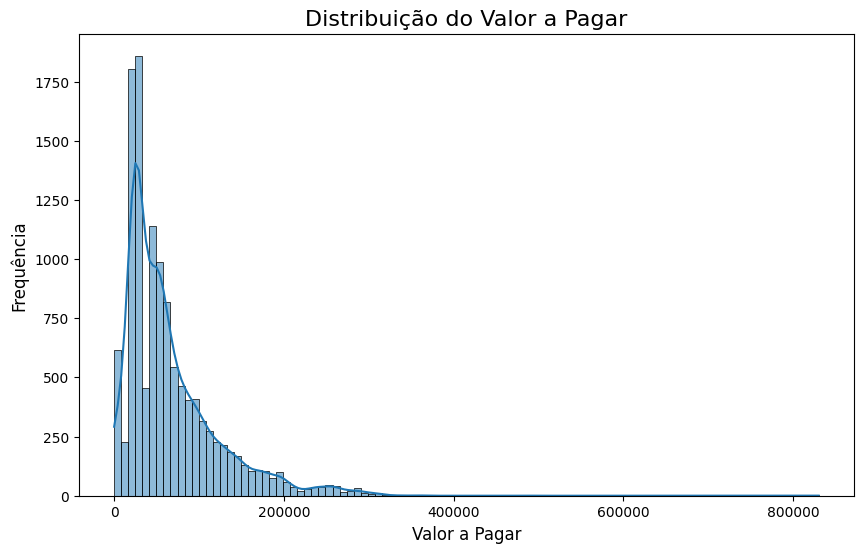

In [43]:
plt.figure(figsize=(10, 6))

sns.histplot(data=base_pagamentos_teste, x='VALOR_A_PAGAR', bins=100, kde=True)

plt.title('Distribuição do Valor a Pagar', fontsize=16)
plt.xlabel('Valor a Pagar', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

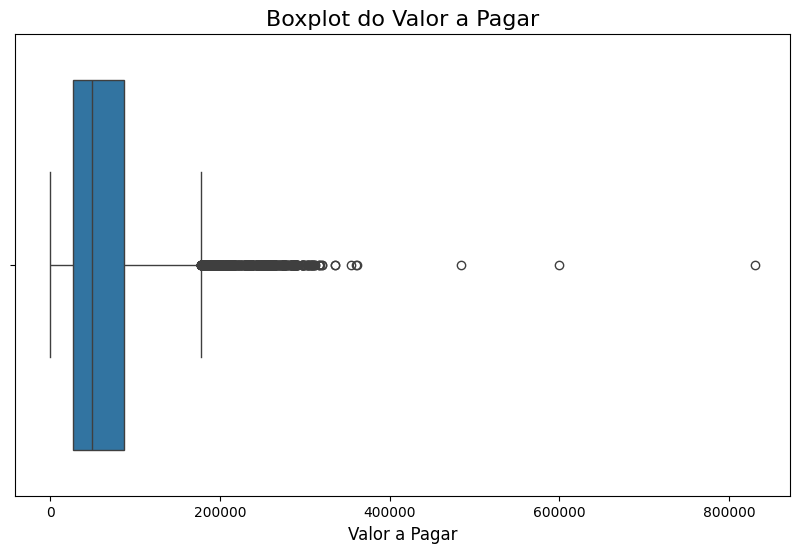

In [44]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=base_pagamentos_teste, x='VALOR_A_PAGAR')

plt.title('Boxplot do Valor a Pagar', fontsize=16)
plt.xlabel('Valor a Pagar', fontsize=12)
plt.show()

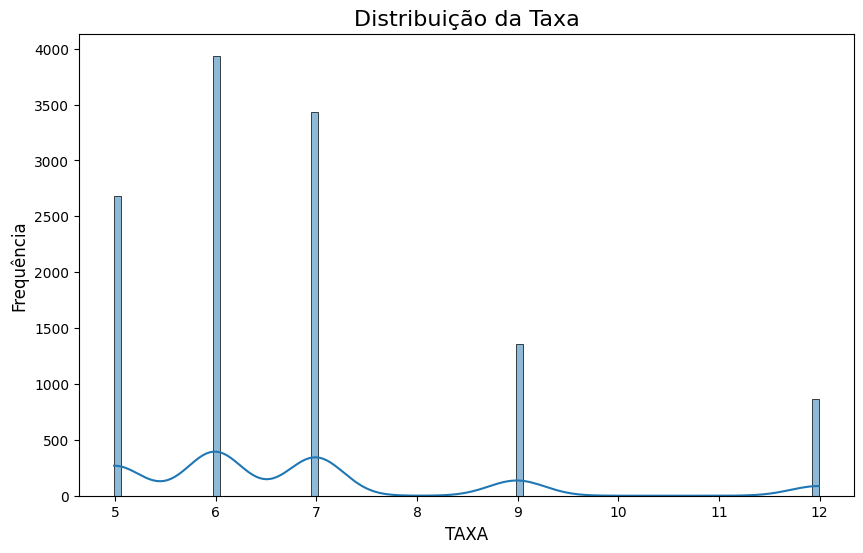

In [45]:
plt.figure(figsize=(10, 6))

sns.histplot(data=base_pagamentos_teste, x='TAXA', bins=100, kde=True)

plt.title('Distribuição da Taxa', fontsize=16)
plt.xlabel('TAXA', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

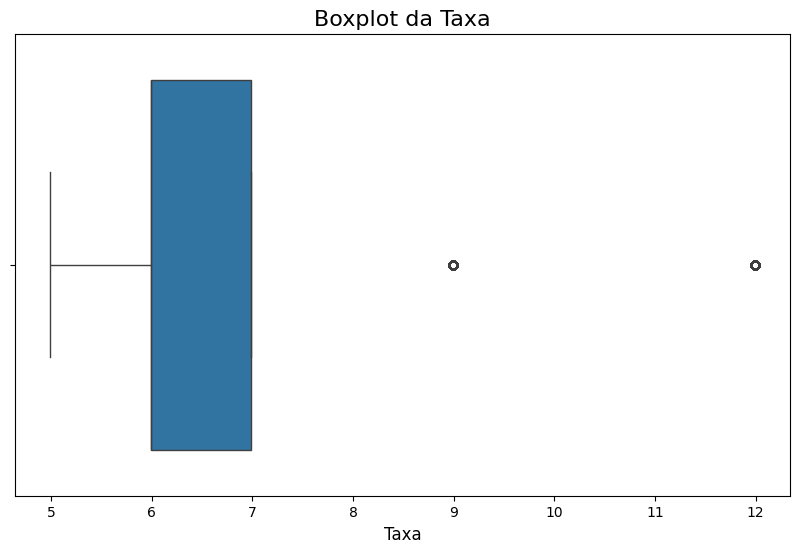

In [46]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=base_pagamentos_teste, x='TAXA')

plt.title('Boxplot da Taxa', fontsize=16)
plt.xlabel('Taxa', fontsize=12)
plt.show()

Por último,na base_pagamentos_teste na coluna da 'TAXA' temos dados extremamente semelhantes com o que acontece na base_pagamentos_desenvolvimento. Já no 'VALOR_A_PAGAR' temos dados um pouco diferentes como podemos ver ao comparar o histograma e o boxplot das duas bases, mas a estratégia continua a mesma e aplicaremos o mesmo pré-processamento

# Pré-processamento

***Criação da Variável Target***

O primeiro passo para isso é converter 'DATA_VENCIMENTO' e 'DATA_PAGAMENTO' para o formato datetime, assim poderemos manipular e depois calcular a diferença entre as datas

In [178]:
base_pagamentos_desenvolvimento['DATA_VENCIMENTO'] = pd.to_datetime(base_pagamentos_desenvolvimento['DATA_VENCIMENTO'])
base_pagamentos_desenvolvimento['DATA_PAGAMENTO'] = pd.to_datetime(base_pagamentos_desenvolvimento['DATA_PAGAMENTO'])

Com as colunas já no formato datetime, calculamos então uma coluna chamada 'DIAS_ATRASO' referente a quantidade de dias que se passaram para efetuar o pagamento após o dia de vencimento

In [179]:
base_pagamentos_desenvolvimento['DIAS_ATRASO'] = (base_pagamentos_desenvolvimento['DATA_PAGAMENTO'] - base_pagamentos_desenvolvimento['DATA_VENCIMENTO']).dt.days

E por último chegamos no nosso objetivo dessa parte que é a coluna revelando se é inadimplente(se tiver demorado pelo menos 5 dias para pagar)

In [180]:
base_pagamentos_desenvolvimento['INADIMPLENTE'] = (base_pagamentos_desenvolvimento['DIAS_ATRASO'] >= 5).astype(int)

***Criação da Base Final***

Para criar a base_final_treino tomamos como início a base_pagamentos_desenvolvimento(que contém a variável alvo) e então iremos ir unindo as bases sempre tomando como referencia a base_pagamentos_desenvolvimento e unindo pelo 'ID_CLIENTE' a base_cadastral e pelo 'ID_CLIENTE' e 'SAFRA_REF' a base_info. Após isso, fazemos o mesmo para montar a base_final_teste que parte da base_pagamentos_teste

In [181]:
base_final_treino = base_pagamentos_desenvolvimento.copy()

base_final_treino = pd.merge(base_final_treino, base_cadastral, on='ID_CLIENTE', how='left')

base_final_treino = pd.merge(base_final_treino, base_info, on=['ID_CLIENTE', 'SAFRA_REF'], how='left')

In [182]:
base_final_teste = base_pagamentos_teste.copy()

base_final_teste = pd.merge(base_final_teste, base_cadastral, on='ID_CLIENTE', how='left')

base_final_teste = pd.merge(base_final_teste, base_info, on=['ID_CLIENTE', 'SAFRA_REF'], how='left')

base_final_teste = base_final_teste.drop(columns=['INADIMPLENTE', 'DIAS_ATRASO'], errors='ignore')

In [183]:
base_final_treino

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DIAS_ATRASO,INADIMPLENTE,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,0,0,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65,NaN,NaN
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,1,0,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65,NaN,NaN
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,1,0,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65,NaN,NaN
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,6,1,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65,NaN,NaN
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,0,0,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77409,2951563549197799278,2021-06,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99,0,0,2000-08-15,11,NaN,Comércio,AOL,PEQUENO,13,280343.0,161.0
77410,5220206408301580591,2021-06,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99,0,0,2021-04-08,19,NaN,Indústria,GMAIL,GRANDE,25,235315.0,87.0
77411,5860276371789140450,2021-06,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99,0,0,2011-02-15,91,NaN,Serviços,HOTMAIL,GRANDE,67,100006.0,NaN
77412,2814790209436551216,2021-06,2021-06-30,2021-07-16,2021-07-16,90231.05,6.99,0,0,2021-05-13,(1,NaN,Serviços,YAHOO,MEDIO,14,NaN,NaN


***Tratamento dos Dados***

Para o início, começamos trabalhando com as datas, convertendo o restante das colunas que são datas no formato datetime para assim podemos manipular elas(podendo criar novas colunas a partir das já existentes) e substituindo a coluna 'SAFRA_REF' por 'SAFRA_REF_DATE' que é a antiga coluna mas agora no formato datetime e com o primeiro dia do mês para seguir boas práticas. 



In [184]:
colunas_data = ['DATA_EMISSAO_DOCUMENTO', 'DATA_VENCIMENTO', 'DATA_CADASTRO']

for col in colunas_data:
    base_final_treino[col] = pd.to_datetime(base_final_treino[col])
    base_final_teste[col] = pd.to_datetime(base_final_teste[col])

base_final_treino['SAFRA_REF_DATE'] = pd.to_datetime(base_final_treino['SAFRA_REF'] + '-01')
base_final_teste['SAFRA_REF_DATE'] = pd.to_datetime(base_final_teste['SAFRA_REF'] + '-01')

Agora já preparando essa informação para poder ser usada pelo modelo, retiramos o ano e o mês para diferentes colunas

In [185]:
base_final_treino['ANO_SAFRA'] = base_final_treino['SAFRA_REF_DATE'].dt.year
base_final_treino['MES_SAFRA'] = base_final_treino['SAFRA_REF_DATE'].dt.month

base_final_teste['ANO_SAFRA'] = base_final_teste['SAFRA_REF_DATE'].dt.year
base_final_teste['MES_SAFRA'] = base_final_teste['SAFRA_REF_DATE'].dt.month

Criando uma nova variável para saber há quanto tempo o cliente está cadastrado no momento da cobrança

In [186]:
base_final_treino['TEMPO_CLIENTE_DIAS'] = (base_final_treino['DATA_VENCIMENTO'] - base_final_treino['DATA_CADASTRO']).dt.days
base_final_teste['TEMPO_CLIENTE_DIAS'] = (base_final_teste['DATA_VENCIMENTO'] - base_final_teste['DATA_CADASTRO']).dt.days

Criando a variável 'PRAZO_PAGAMENTO_DIAS' para saber quantos dias o cliente teve para pagar a conta

In [187]:
base_final_treino['PRAZO_PAGAMENTO_DIAS'] = (base_final_treino['DATA_VENCIMENTO'] - base_final_treino['DATA_EMISSAO_DOCUMENTO']).dt.days
base_final_teste['PRAZO_PAGAMENTO_DIAS'] = (base_final_teste['DATA_VENCIMENTO'] - base_final_teste['DATA_EMISSAO_DOCUMENTO']).dt.days

Extraindo o dia do mês e o mês da data de vencimento para preparar a base para o modelo

In [188]:
base_final_treino['DIA_MES_VENCIMENTO'] = base_final_treino['DATA_VENCIMENTO'].dt.day
base_final_teste['DIA_MES_VENCIMENTO'] = base_final_teste['DATA_VENCIMENTO'].dt.day

base_final_treino['MES_VENCIMENTO'] = base_final_treino['DATA_VENCIMENTO'].dt.month
base_final_teste['MES_VENCIMENTO'] = base_final_teste['DATA_VENCIMENTO'].dt.month

**Tratando valores nulos e codificando as variáveis**

Como já foi explicado anteriomente, na variável FLAG_PF iremos tratar ela para trocar os valores nulos, que na verdade representam clientes pessoa jurídica. Para usamos usamos a função `.map`para alterar de X para 1(indicando que é pessoa física) e `.fillna(0)` para preencher os nulos com 0

In [189]:
mapeamento_PF = {'X': 1}

base_final_treino['FLAG_PF_TRATADO'] = base_final_treino['FLAG_PF'].map(mapeamento_PF).fillna(0)
base_final_treino['FLAG_PF_TRATADO'] = base_final_treino['FLAG_PF_TRATADO'].astype(int)

base_final_teste['FLAG_PF_TRATADO'] = base_final_treino['FLAG_PF'].map(mapeamento_PF).fillna(0)
base_final_teste['FLAG_PF_TRATADO'] = base_final_treino['FLAG_PF_TRATADO'].astype(int)

Para preecher os valores nulos em 'PORTE' será usado a moda que é mais resistente a outliers(tentei correlacionar ela com outras variáveis como 'NO_FUNCIONARIOS','VALOR_A_PAGAR' e 'RENDA_MES_ANTERIOR' mas nada indicou uma correlação entre elas)

In [190]:
moda_porte = base_final_treino['PORTE'].mode()[0]
print(f"A categoria mais frequente para PORTE é: {moda_porte}")

base_final_treino['PORTE'] = base_final_treino['PORTE'].fillna(moda_porte)
base_final_teste['PORTE'] = base_final_teste['PORTE'].fillna(moda_porte)

A categoria mais frequente para PORTE é: MEDIO


Para 'NO_FUNCIONARIOS', 'VALOR_A_PAGAR', 'RENDA_MES_ANTERIOR' também tentei encontrar outras maneiras de imputar baseado em outra variável,mas não achei correlação, então, baseado na análise dos dados anterior, imputei a mediana

In [191]:
colunas_para_imputar = ['NO_FUNCIONARIOS', 'VALOR_A_PAGAR', 'RENDA_MES_ANTERIOR']

for col in colunas_para_imputar:
    mediana = base_final_treino[col].median()
    print(f"A mediana para a coluna '{col}' é: {mediana:.2f}")

    base_final_treino[col] = base_final_treino[col].fillna(mediana)
    base_final_teste[col] = base_final_teste[col].fillna(mediana)

A mediana para a coluna 'NO_FUNCIONARIOS' é: 118.00
A mediana para a coluna 'VALOR_A_PAGAR' é: 34758.69
A mediana para a coluna 'RENDA_MES_ANTERIOR' é: 240502.00


Tratando os valores nulos de 'SEGMENTO_INDUSTRIAL', 'DOMINIO_EMAIL' e 'DDD'. No caso do e-mail e do segmento substituimos os valores nulos por 'Desconhecido', já no caso do DDD, preenchemos os valores com 0 para representar que não temos tal dado e ajustamos o problema de que havia números com parenteses retirando eles

In [192]:
base_final_treino['DOMINIO_EMAIL'] = base_final_treino['DOMINIO_EMAIL'].fillna('Desconhecido')
base_final_teste['DOMINIO_EMAIL'] = base_final_teste['DOMINIO_EMAIL'].fillna('Desconhecido')

base_final_treino['SEGMENTO_INDUSTRIAL'] = base_final_treino['SEGMENTO_INDUSTRIAL'].fillna('Desconhecido')
base_final_teste['SEGMENTO_INDUSTRIAL'] = base_final_teste['SEGMENTO_INDUSTRIAL'].fillna('Desconhecido')

# Preenchendo valores nulos com 0 e removendo parênteses
base_final_treino['DDD'] = base_final_treino['DDD'].fillna(0).astype(str).str.replace('(', '', regex=False)
base_final_teste['DDD'] = base_final_teste['DDD'].fillna(0).astype(str).str.replace('(', '', regex=False)

base_final_treino['DDD'] = pd.to_numeric(base_final_treino['DDD'], errors='coerce').fillna(0).astype(int)
base_final_teste['DDD'] = pd.to_numeric(base_final_teste['DDD'], errors='coerce').fillna(0).astype(int)

Codificando as variáveis categóricas 'SEGMENTO_INDUSTRIAL', 'DOMINIO_EMAIL' e 'PORTE'

In [193]:
mapa_porte = {'PEQUENO': 0, 'MEDIO': 1, 'GRANDE': 2}

base_final_treino['PORTE_encoded'] = base_final_treino['PORTE'].map(mapa_porte)
base_final_teste['PORTE_encoded'] = base_final_teste['PORTE'].map(mapa_porte)

In [194]:
colunas_nominais = ['SEGMENTO_INDUSTRIAL', 'DOMINIO_EMAIL']

base_final_treino = pd.get_dummies(base_final_treino, columns=colunas_nominais, dtype=int)
base_final_teste = pd.get_dummies(base_final_teste, columns=colunas_nominais, dtype=int)

Tratando o CEP, para facilitar separamos os CEPS por região para depois fazer a codificação dos dados(foi seguido segundo as [regras do número do CEP](https://www.correios.com.br/enviar/precisa-de-ajuda/tudo-sobre-cep))

In [195]:
regioes_map = {
    '0': 'Sudeste', '1': 'Sudeste', '2': 'Sudeste', '3': 'Sudeste',
    '4': 'Nordeste', '5': 'Nordeste', '6': 'Norte',
    '7': 'Centro-Oeste',
    '8': 'Sul', '9': 'Sul'
}

base_final_treino['REGIAO_BRASIL'] = base_final_treino['CEP_2_DIG'].str[0].map(regioes_map).fillna('Desconhecido')
base_final_teste['REGIAO_BRASIL'] = base_final_teste['CEP_2_DIG'].str[0].map(regioes_map).fillna('Desconhecido')

Para fazer agora o One-Hot Enconding na coluna 'REGIAO_BRASIL' criamos uma base auxiliar temporária apenas para garantir a consistência entre treino e teste

In [196]:
# Adicionando uma coluna temporária para identificar a origem
base_final_treino['__origem__'] = 'treino'
base_final_teste['__origem__'] = 'teste'

# Cria uma base junta temporária
base_combinada = pd.concat([base_final_treino, base_final_teste], axis=0)

base_combinada = pd.get_dummies(base_combinada, columns=['REGIAO_BRASIL'], dtype=int)

# Separa de volta as bases com base na coluna auxiliar
base_final_treino = base_combinada[base_combinada['__origem__'] == 'treino'].drop(columns='__origem__').copy()
base_final_teste = base_combinada[base_combinada['__origem__'] == 'teste'].drop(columns='__origem__').copy()

base_final_teste = base_final_teste.drop(columns=['INADIMPLENTE', 'DIAS_ATRASO'], errors='ignore')

Efetuando a transformação logarítmica conforme foi descrito na análise dos dados das bases para poder comprimir a escala da variáveis e assim os outliers não afetarem o modelo

In [197]:
colunas_para_log = ['VALOR_A_PAGAR', 'RENDA_MES_ANTERIOR']

for col in colunas_para_log:
    base_final_treino[col + '_log'] = np.log1p(base_final_treino[col])
    base_final_teste[col + '_log'] = np.log1p(base_final_teste[col])

#Para termos uma noção de como ficou os números
print(base_final_treino[['VALOR_A_PAGAR', 'VALOR_A_PAGAR_log']].head())

   VALOR_A_PAGAR  VALOR_A_PAGAR_log
0       35516.41          10.477778
1       17758.21           9.784660
2       17431.96           9.766118
3        1341.00           7.201916
4       21309.85           9.966972


Por último,criando as 2 últimas colunas para identificar se o cliente já foi inadimplente e quantas vezes ele foi inadimplente. Para isso, temos que tomar muito cuidado para não vazar informações do futuro. O primeiro passo é colocar tudo em ordem cronológica por cliente para verificar se já foi inadiplente anteriormente. 

In [198]:
base_final_treino = base_final_treino.sort_values(by=['ID_CLIENTE', 'SAFRA_REF_DATE'])

Então calculamos a soma cumulativa das inadimplências para cada cliente, usamos o .shift para garantir que estamos usando apenas o histórico passado. O primeiro registo é assegurado que inicia com 0 e assim começa a soma cumulativa. Com isso feito, podemos verificar se um cliente já foi inadimplênte. Tudo isso primeiramente na base_final_treino

In [199]:
soma_cumulativa = base_final_treino.groupby('ID_CLIENTE')['INADIMPLENTE'].cumsum()

base_final_treino['QTD_INADIMPLENCIAS_ANTERIORES'] = soma_cumulativa.shift(1).fillna(0)

primeiras_transacoes_idx = base_final_treino.groupby('ID_CLIENTE').head(1).index
base_final_treino.loc[primeiras_transacoes_idx, 'QTD_INADIMPLENCIAS_ANTERIORES'] = 0

base_final_treino['JA_FOI_INADIMPLENTE'] = (base_final_treino['QTD_INADIMPLENCIAS_ANTERIORES'] > 0).astype(int)

Agora passando esses dados para a base_final_teste

In [ ]:
historico_clientes = base_final_treino.groupby('ID_CLIENTE').agg(QTD_INADIMPLENCIAS_ANTERIORES=('INADIMPLENTE', 'sum')).reset_index()

historico_clientes['JA_FOI_INADIMPLENTE'] = (historico_clientes['QTD_INADIMPLENCIAS_ANTERIORES'] > 0).astype(int)

base_final_teste = pd.merge(base_final_teste, historico_clientes, on='ID_CLIENTE', how='left')

base_final_teste[['QTD_INADIMPLENCIAS_ANTERIORES', 'JA_FOI_INADIMPLENTE']] = base_final_teste[['QTD_INADIMPLENCIAS_ANTERIORES', 'JA_FOI_INADIMPLENTE']].fillna(0)

Removendo as colunas antigas que já se tornaram desnecessárias

In [201]:
colunas_desnecessarias = ['FLAG_PF','PORTE','CEP_2_DIG','VALOR_A_PAGAR', 'RENDA_MES_ANTERIOR', 'SAFRA_REF_DATE',
                          'DATA_EMISSAO_DOCUMENTO', 'DATA_PAGAMENTO','DATA_VENCIMENTO', 'DATA_CADASTRO']

for col in colunas_desnecessarias:
  base_final_treino.drop(columns=[col], inplace=True)
  base_final_teste.drop(columns=[col], inplace=True)

base_final_teste_com_id = base_final_teste.copy() # será usada para gerar o arquivo de submissão

colunas_submissao = ['ID_CLIENTE','SAFRA_REF' ]
for col in colunas_submissao:
  base_final_treino.drop(columns=[col], inplace=True) 
  base_final_teste.drop(columns=[col], inplace=True) 
  
base_final_treino.drop(columns=['DIAS_ATRASO'], inplace=True) # só existe na base de treino

Verificando a base após todas as mudanças

In [202]:
base_final_treino

,TAXA,INADIMPLENTE,DDD,NO_FUNCIONARIOS,ANO_SAFRA,MES_SAFRA,TEMPO_CLIENTE_DIAS,PRAZO_PAGAMENTO_DIAS,DIA_MES_VENCIMENTO,MES_VENCIMENTO,...,REGIAO_BRASIL_Centro-Oeste,REGIAO_BRASIL_Desconhecido,REGIAO_BRASIL_Nordeste,REGIAO_BRASIL_Norte,REGIAO_BRASIL_Sudeste,REGIAO_BRASIL_Sul,VALOR_A_PAGAR_log,RENDA_MES_ANTERIOR_log,QTD_INADIMPLENCIAS_ANTERIORES,JA_FOI_INADIMPLENTE
166,5.99,0.0,11,118.0,2018,8,2759.0,18,4,9,...,0,0,0,0,1,0,11.519078,12.390488,0.0,0
167,5.99,0.0,11,118.0,2018,8,2766.0,20,11,9,...,0,0,0,0,1,0,11.402595,12.390488,0.0,0
168,5.99,0.0,11,118.0,2018,8,2765.0,18,10,9,...,0,0,0,0,1,0,11.451729,12.390488,0.0,0
169,5.99,0.0,11,118.0,2018,8,2765.0,18,10,9,...,0,0,0,0,1,0,11.539442,12.390488,0.0,0
170,5.99,0.0,11,118.0,2018,8,2766.0,18,11,9,...,0,0,0,0,1,0,10.847277,12.390488,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73665,11.99,0.0,11,109.0,2021,5,5776.0,16,1,6,...,0,0,0,0,0,1,11.583592,12.453456,2.0,1
75223,5.99,0.0,11,109.0,2021,5,5783.0,16,8,6,...,0,0,0,0,0,1,10.555133,12.453456,2.0,1
76404,5.99,0.0,11,105.0,2021,6,5807.0,16,2,7,...,0,0,0,0,0,1,10.669688,13.047562,2.0,1
76405,5.99,0.0,11,105.0,2021,6,5810.0,17,5,7,...,0,0,0,0,0,1,11.583569,13.047562,2.0,1


In [203]:
base_final_treino.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77414 entries, 166 to 76406
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TAXA                              77414 non-null  float64
 1   INADIMPLENTE                      77414 non-null  float64
 2   DDD                               77414 non-null  int64  
 3   NO_FUNCIONARIOS                   77414 non-null  float64
 4   ANO_SAFRA                         77414 non-null  int32  
 5   MES_SAFRA                         77414 non-null  int32  
 6   TEMPO_CLIENTE_DIAS                77414 non-null  float64
 7   PRAZO_PAGAMENTO_DIAS              77414 non-null  int64  
 8   DIA_MES_VENCIMENTO                77414 non-null  int32  
 9   MES_VENCIMENTO                    77414 non-null  int32  
 10  FLAG_PF_TRATADO                   77414 non-null  int64  
 11  PORTE_encoded                     77414 non-null  int64  
 12  SEGMENT

In [204]:
base_final_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12275 entries, 0 to 12274
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TAXA                              12275 non-null  float64
 1   DDD                               12275 non-null  int64  
 2   NO_FUNCIONARIOS                   12275 non-null  float64
 3   ANO_SAFRA                         12275 non-null  int32  
 4   MES_SAFRA                         12275 non-null  int32  
 5   TEMPO_CLIENTE_DIAS                12237 non-null  float64
 6   PRAZO_PAGAMENTO_DIAS              12275 non-null  int64  
 7   DIA_MES_VENCIMENTO                12275 non-null  int32  
 8   MES_VENCIMENTO                    12275 non-null  int32  
 9   FLAG_PF_TRATADO                   12275 non-null  int64  
 10  PORTE_encoded                     12275 non-null  int64  
 11  SEGMENTO_INDUSTRIAL_Comércio      12275 non-null  int64  
 12  SEGM

# Modelagem

**Separação entre treino e validação**

In [74]:
X = base_final_treino.drop(columns=['INADIMPLENTE'])
y = base_final_treino['INADIMPLENTE']

In [75]:
X_treino, X_validacao, y_treino, y_validacao = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Formato do treino: {X_treino.shape}")
print(f"Formato da validação: {X_validacao.shape}")

Formato do treino: (61931, 32)
Formato da validação: (15483, 32)


**Logistic Regression**

Primeiro iniciamos com um modelo mais simples, o Logistic Regression, um algoritmo rápido e de fácil interpretação, para ter como ponto de partida e base, assim podemos comparar os resultados futuros dos modelos mais complexos com ele

Como a Regressão Logística é sensível à escala das features, é uma boa prática usar os dados padronizados para nenhuma variável se sobressair sobre as outras

In [76]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_treino)

X_val_scaled = scaler.transform(X_validacao)

In [77]:
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

log_reg_model.fit(X_treino, y_treino)

c:\Users\Richard Junior\OneDrive\Documentos\python\Datarisk\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [78]:
y_proba_val_lr = log_reg_model.predict_proba(X_val_scaled)[:, 1]

auc_lr = roc_auc_score(y_validacao, y_proba_val_lr)

print(f"\nAUC da Regressão Logística na Validação: {auc_lr:.4f}")


AUC da Regressão Logística na Validação: 0.8358


c:\Users\Richard Junior\OneDrive\Documentos\python\Datarisk\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Verificando as features com maior impacto na inadimplência

In [79]:
coeficientes = pd.DataFrame({
    'feature': X_treino.columns,
    'coeficiente': log_reg_model.coef_[0]
}).sort_values('coeficiente', ascending=False)

print("Features que aumentam chance de inadimplência:")
print(coeficientes.head(10))

print("\nFeatures que diminuem chance de inadimplência):")
print(coeficientes.tail(10))

Features que aumentam chance de inadimplência:
                             feature  coeficiente
31               JA_FOI_INADIMPLENTE     1.384444
25               REGIAO_BRASIL_Norte     0.244450
24            REGIAO_BRASIL_Nordeste     0.235102
18               DOMINIO_EMAIL_GMAIL     0.154064
13     SEGMENTO_INDUSTRIAL_Indústria     0.113962
19             DOMINIO_EMAIL_HOTMAIL     0.105077
14      SEGMENTO_INDUSTRIAL_Serviços     0.028869
30     QTD_INADIMPLENCIAS_ANTERIORES     0.012603
12  SEGMENTO_INDUSTRIAL_Desconhecido     0.009566
23        REGIAO_BRASIL_Desconhecido     0.009476

Features que diminuem chance de inadimplência):
                         feature  coeficiente
8                 MES_VENCIMENTO    -0.032080
16             DOMINIO_EMAIL_BOL    -0.040450
10                 PORTE_encoded    -0.042641
15             DOMINIO_EMAIL_AOL    -0.057939
26         REGIAO_BRASIL_Sudeste    -0.124566
21           DOMINIO_EMAIL_YAHOO    -0.140225
11  SEGMENTO_INDUSTRIAL_Comércio

**Random Forest**

Agora vamos usar um modelo um pouco mais complexo que é bom para resolver problemas como esse de dados tabulares e não é sensível a escala como no caso da Regressão Logística

In [80]:
rf_model = RandomForestClassifier(random_state=42,max_depth=30, n_jobs=-1)

rf_model.fit(X_treino, y_treino)

RandomForestClassifier(max_depth=30, n_jobs=-1, random_state=42)

Acurácia na Validação: 0.9644
AUC na Validação: 0.9623

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     14396
         1.0       0.83      0.62      0.71      1087

    accuracy                           0.96     15483
   macro avg       0.90      0.80      0.85     15483
weighted avg       0.96      0.96      0.96     15483


Matriz de Confusão:


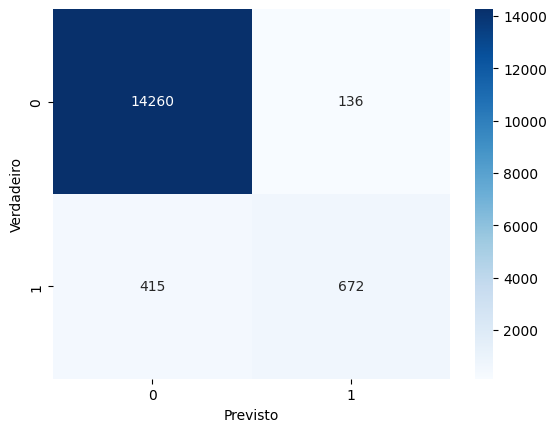

In [81]:
y_pred_val = rf_model.predict(X_validacao)
y_proba_val = rf_model.predict_proba(X_validacao)[:, 1]

accuracy = accuracy_score(y_validacao, y_pred_val)
auc = roc_auc_score(y_validacao, y_proba_val)

print(f"Acurácia na Validação: {accuracy:.4f}")
print(f"AUC na Validação: {auc:.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_validacao, y_pred_val))

print("\nMatriz de Confusão:")
cm = confusion_matrix(y_validacao, y_pred_val)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

Agora para ver as features mais relevantes para decididir a inadimplência usamos o SHAP. Primeiramente vemos com relação ao primeiro caso

In [205]:
shap.initjs()

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_validacao)

cliente_idx = 0
shap_values_cliente_classe1 = shap_values[cliente_idx][:, 1]

features_cliente = X_validacao.iloc[cliente_idx,:]

shap.force_plot(
    explainer.expected_value[1],
    shap_values_cliente_classe1,
    features_cliente
)

E agora com relação a todos os casos

100%|===================| 15481/15483 [71:44<00:00]        

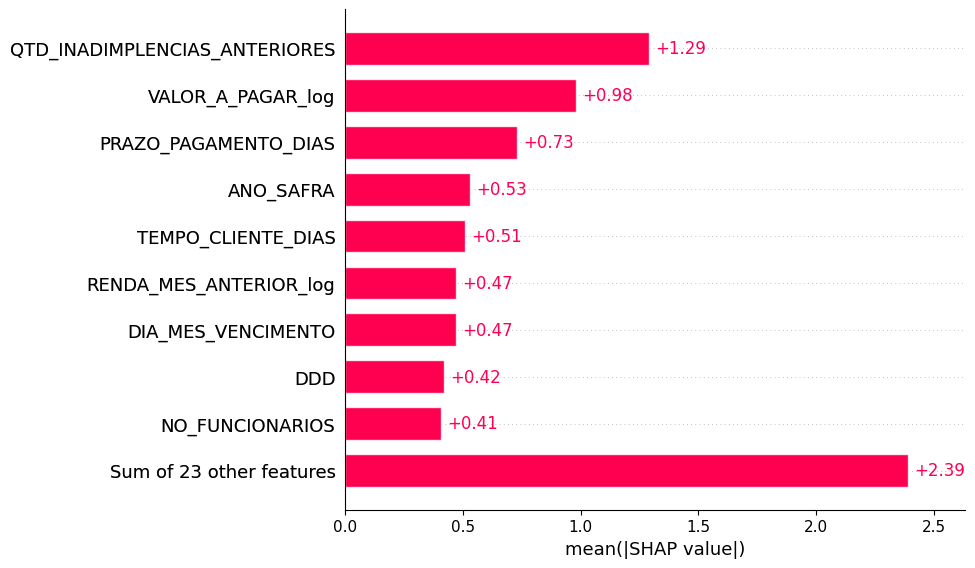

In [103]:
shap_values_rf = explainer(X_validacao)
shap.plots.bar(shap_values_rf)

**XGBoost**

Esse é um dos melhores algoritmos para essa tarefa, sendo considerado o padrão da indústria para dados tabulares por vários motivos, ele é o modelo ideal para buscar a máxima performance preditiva neste problema de risco de crédito. Para esse caso que não temos uma base grande, ele tende a ir melhor que o modelo LightGBM

In [98]:
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    n_estimators=3000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight= (y_treino.value_counts()[0] / y_treino.value_counts()[1]),
    random_state=42
)

xgb_model.fit(
    X_treino,
    y_treino,
    eval_set=[(X_validacao, y_validacao)],
    verbose=False
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=3000,
              n_jobs=None, num_parallel_tree=None, ...)

AUC na Validação com XGBoost: 0.9602

Relatório de Classificação (XGBoost):
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     14396
         1.0       0.72      0.75      0.74      1087

    accuracy                           0.96     15483
   macro avg       0.85      0.87      0.86     15483
weighted avg       0.96      0.96      0.96     15483


Matriz de Confusão (XGBoost):


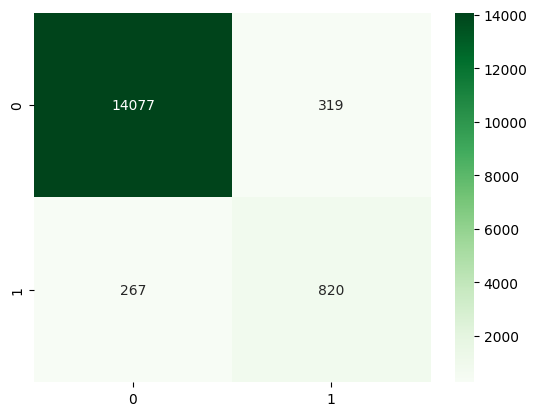

In [99]:
y_proba_val_xgb = xgb_model.predict_proba(X_validacao)[:, 1]
y_pred_val_xgb = (y_proba_val_xgb > 0.5).astype(int)

auc_xgb = roc_auc_score(y_validacao, y_proba_val_xgb)
print(f"AUC na Validação com XGBoost: {auc_xgb:.4f}")

print("\nRelatório de Classificação (XGBoost):")
print(classification_report(y_validacao, y_pred_val_xgb))

print("\nMatriz de Confusão (XGBoost):")
cm_xgb = confusion_matrix(y_validacao, y_pred_val_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens')
plt.show()

Verificando as variáveis mais importantes para a decisão por meio do SHAP

In [100]:
explainer_xgb = shap.Explainer(xgb_model, X_treino)

shap_values_xgb = explainer_xgb(X_validacao)

100%|===================| 15478/15483 [53:42<00:01]        

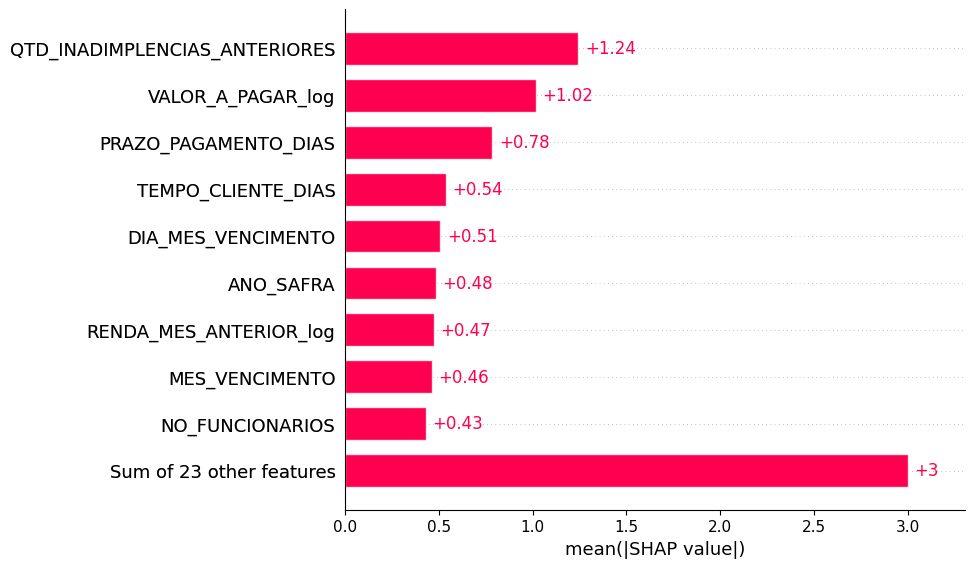

In [101]:
shap.plots.bar(shap_values_xgb)

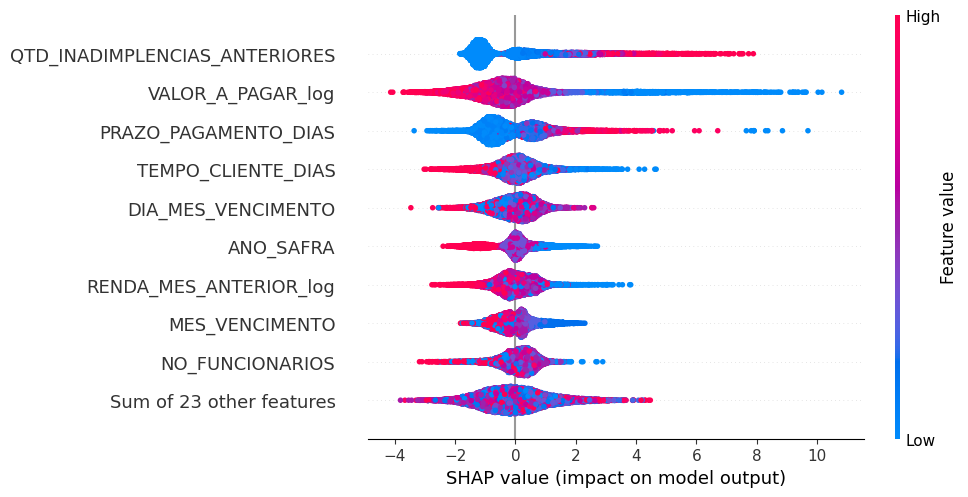

In [102]:
shap.plots.beeswarm(shap_values_xgb)

Como podemos ver, nos 3 modelos, o fato de já ter sido inadimplente foi um fator com grande impacto, quanto mais vezes isso ter acontecido, maior as chances de acontecer novamente. O valor a pagar tambem mostra que quando maior ele for, maior a chance de ser inadimplente e quanto menor, as chances de não ser inadimplente são mais elevadas. Já no prazo de pagamento, referente a quantos dias o cliente tem para pagar tem algo interessante, a medida que aumenta ele tem maior chances de ser inadimplente, mas se for um prazo bem longo essa relação se inverte. Na renda vemos algo que faz sentido sendo confirmado, quanto maior a renda, menor a probabilidade, algo parecido é visto no número de funcionários

# Gerando o arquivo de submissão

In [1]:
X_teste = base_final_teste_com_id.drop(columns=['ID_CLIENTE', 'SAFRA_REF'])

NameError: name 'base_final_teste_com_id' is not defined

In [ ]:
probabilidades_finais = rf_model.predict_proba(X_teste)[:, 1]

In [ ]:
df_submissao = pd.DataFrame({
    'ID_CLIENTE': base_final_teste_com_id['ID_CLIENTE'],
    'SAFRA_REF': base_final_teste_com_id['SAFRA_REF'],
    'PROBABILIDADE_INADIMPLENCIA': probabilidades_finais
})

In [ ]:
df_submissao.to_csv('submissao_case.csv', index=False)

print("Amostra do arquivo de submissão:")
print(df_submissao.head())

Amostra do arquivo de submissão:
            ID_CLIENTE SAFRA_REF  PROBABILIDADE_INADIMPLENCIA
0  5058298901476893676   2021-07                         0.01
1   274692171162531764   2021-07                         0.00
2   274692171162531764   2021-07                         0.00
3   274692171162531764   2021-07                         0.02
4   465309249432033993   2021-07                         0.01


Referências:

* [Probabilidade Inadimplencia e métodos](https://fastercapital.com/pt/contente/Probabilidade-de-inadimplencia--PD--Metodos-de-estimativa-de-PD-e-suas-aplicacoes-na-gestao-de-risco-de-credito.html)

* Vídeo Youtube : [Sobre a Probabilidade de Default - Outspoken Market](https://www.youtube.com/watch?v=bIT-j40HrDk)


* [Case de inadiplencia GitHub](https://github.com/DanielVieira07/Inadimplencia_case)

* [Label Enconding vs One hot enconding Medium](https://medium.com/biased-algorithms/one-hot-encoding-vs-label-encoding-28aee12b3984)

* [Top 7 Main Models to Know for Tabular Data on Kaggle](https://apxml.com/posts/main-models-to-know-tabular-data-kaggle)

* [XGBoost vs LightGBM: A Performance Comparison on Credit Default Prediction](https://medium.com/@hannie.bao_50786/xgboost-vs-lightgbm-a-performance-comparison-on-credit-default-prediction-e16037728c82)